In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/infobyte/Unemployment_Rate_upto_11_2020.csv')

In [ ]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [ ]:
df.shape

(267, 9)

In [ ]:
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df.isnull().values.any()

False

In [ ]:
df = df.rename(columns={df.columns[0]:'State',df.columns[3]:'Estimated_UR', df.columns[5]:'Estimated_LPR'})

In [ ]:
df.groupby("Region.1").count()

,State,Date,Frequency,Estimated_UR,Estimated Employed,Estimated_LPR,longitude,latitude
Region.1,,,,,,,,
East,40,40,40,40,40,40,40,40
North,79,79,79,79,79,79,79,79
Northeast,38,38,38,38,38,38,38,38
South,60,60,60,60,60,60,60,60
West,50,50,50,50,50,50,50,50


In [ ]:
df.groupby("Region.1").describe()

Estimated_UR                                                        \
                 count       mean        std   min      25%     50%      75%   
Region.1                                                                       
East              40.0  13.916000  13.288121  1.42   6.9350  10.450  15.0100   
North             79.0  15.889620   8.094080  2.20  10.2150  15.500  20.3200   
Northeast         38.0  10.950263  10.820467  0.60   3.6275   5.150  18.0175   
South             60.0  10.454667  13.661697  0.50   3.5725   6.045  10.6375   
West              50.0   8.239000   5.505498  1.84   4.1025   6.305  11.2800   

                  Estimated Employed                ...  longitude           \
             max               count          mean  ...        75%      max   
Region.1                                            ...                       
East       59.23                40.0  1.960237e+07  ...  23.981675  25.0961   
North      43.22                79.0  1.307249e+07  ...  31.104800  33.7782   
Northeast  41.23                38.0  3.617106e+06  ...  26.200600  27.5330   
South      75.85                60.0  1.404059e+07  ...  15.912900  18.1124   
West       21.98                50.0  1.862351e+07  ...  22.258700  22.9734   

          latitude                                                   \
             count       mean       std      min       25%      50%   
Region.1                                                              
East          40.0  85.886625  1.153888  85.0985  85.23455  85.2965   
North         79.0  77.063884  1.998329  74.2179  75.71340  77.1025   
Northeast     38.0  91.342568  1.591388  88.5122  91.36620  91.9882   
South         60.0  78.201583  1.633317  75.7139  76.27110  78.8381   
West          50.0  76.310660  3.717085  71.1924  74.12400  75.7139   

                               
                 75%      max  
Region.1                       
East       85.948575  87.8550  
North      78.096350  80.9462  
Northeast  92.700250  92.9376  
South      79.740000  79.8083  
West       78.656900  81.8661  

[5 rows x 40 columns]

In [ ]:
df.columns

Index(['State', ' Date', ' Frequency', 'Estimated_UR', ' Estimated Employed',
       'Estimated_LPR', 'Region.1', 'longitude', 'latitude'],
      dtype='object')

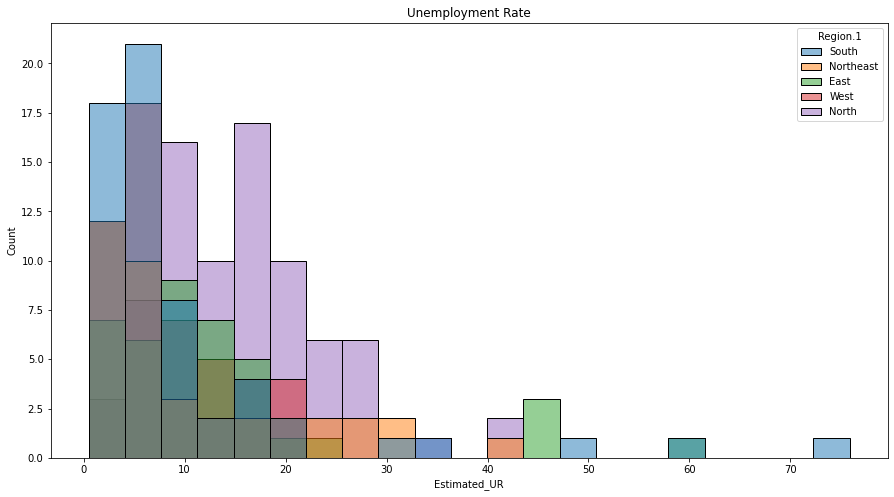

In [ ]:
#unemployment rate according to different States of India
df.columns= ["State","Date","Frequency","Estimated_UR","Estimated Employed","Estimated_LPR","Region.1","longitude","latitude"]

plt.figure(figsize=(15, 8))
plt.title("Unemployment Rate")
sns.histplot(x="Estimated_UR", hue="Region.1", data=df)
plt.show()

In [ ]:
df['Region.1'].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [ ]:
import plotly.express as px

In [ ]:
df.columns

Index(['State', 'Date', 'Frequency', 'Estimated_UR', 'Estimated Employed',
       'Estimated_LPR', 'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [ ]:
region = df.groupby(["Region.1"])[['Estimated_UR', "Estimated Employed", "Estimated_LPR"]].mean()
region = pd.DataFrame(region).reset_index()
fig = px.bar(region, x="Estimated_UR", y="Region.1")
fig.show()

In [ ]:
fig = px.pie(region, values='Estimated_UR', names='Region.1', title='Unemployment distribution amongst region')
fig.show()